In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('twitter_alldata_cleaned.csv',lineterminator='\n')
data = data.iloc[:,1:]

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935564 entries, 0 to 1935563
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   date       object
 1   content    object
 2   location   object
 3   num_likes  object
dtypes: object(4)
memory usage: 59.1+ MB


In [8]:
data = data.dropna()

In [9]:
def hot(s):
    if type(s) is int: 
        if s > 0: return True
        else: return False
    return False
data['is_hot_tweet'] = data['num_likes'].map(lambda i: hot(i))
data = data[data['is_hot_tweet']==True]

/var/folders/mf/1xd8lcyj0yd825308clxpm980000gn/T/ipykernel_60772/3268118872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_hot_tweet'] = data['num_likes'].map(lambda i: hot(i))


In [10]:
data['month'] = data['date'].map(lambda i: str(i)[:7])

In [11]:
data = data.loc[:,['date','month','content']].reset_index(drop=True)
data

,date,month,content
0,2018-03-05,2018-03,I just published “You ready to reveal your Axi...
1,2018-03-14,2018-03,"DAppブラウザーアプリ""Cipher Browser""に、ゲームが一挙5タイトル追加。 ..."
2,2018-03-18,2018-03,THE BREAKOUT HAS BEGUN!!! The first batch of 《...
3,2018-03-18,2018-03,We added a really cool Intro section on our si...
4,2018-03-19,2018-03,#BTC Axie Infinity: Redefinition of Blockchain...
...,...,...,...
537561,2022-03-05,2022-03,@DojoP2E @axieu_io @AxieInfinity @JacquilynRui...
537562,2022-03-05,2022-03,@BitrueOfficial @solana @AxieInfinity @Theta_N...
537563,2022-03-05,2022-03,@ThanasAxieTh @AxieInfinity BIG YAK! :)
537564,2022-03-05,2022-03,@berrymxngo @AxieInfinity Salute to your effor...


In [12]:
d = data.groupby(by='month').count()

In [13]:
num_tweets = d['date']

In [14]:
def remove_(s):
    remove_idx = []
    for i in range(len(s)):
        char = s[i]
        if not (48<=ord(char)<=57 or 65<=ord(char)<=90 or 97<=ord(char)<=122 or char == ' '): remove_idx.append(i)
    result = ''
    for i in range(len(s)): 
        if i not in remove_idx: result+=s[i]
    return result

data['cleaned_content'] = data['content'].map(lambda i:remove_(i))

In [15]:
data

,date,month,content,cleaned_content
0,2018-03-05,2018-03,I just published “You ready to reveal your Axi...,I just published You ready to reveal your Axies
1,2018-03-14,2018-03,"DAppブラウザーアプリ""Cipher Browser""に、ゲームが一挙5タイトル追加。 ...",DAppCipher Browser5 Axie Infinity CryptoBots ...
2,2018-03-18,2018-03,THE BREAKOUT HAS BEGUN!!! The first batch of 《...,THE BREAKOUT HAS BEGUN The first batch of Orig...
3,2018-03-18,2018-03,We added a really cool Intro section on our si...,We added a really cool Intro section on our si...
4,2018-03-19,2018-03,#BTC Axie Infinity: Redefinition of Blockchain...,BTC Axie Infinity Redefinition of Blockchain G...
...,...,...,...,...
537561,2022-03-05,2022-03,@DojoP2E @axieu_io @AxieInfinity @JacquilynRui...,DojoP2E axieuio AxieInfinity JacquilynRuiz Kri...
537562,2022-03-05,2022-03,@BitrueOfficial @solana @AxieInfinity @Theta_N...,BitrueOfficial solana AxieInfinity ThetaNetwor...
537563,2022-03-05,2022-03,@ThanasAxieTh @AxieInfinity BIG YAK! :),ThanasAxieTh AxieInfinity BIG YAK
537564,2022-03-05,2022-03,@berrymxngo @AxieInfinity Salute to your effor...,berrymxngo AxieInfinity Salute to your effort ...


In [51]:
num_tweets

month
2018-03        38
2018-04       186
2018-05       148
2018-06       277
2018-07       213
2018-08       253
2018-09       213
2018-10       429
2018-11       298
2018-12       387
2019-01       627
2019-02       472
2019-03       976
2019-04       916
2019-05      1062
2019-06       698
2019-07       559
2019-08       415
2019-09       264
2019-10       484
2019-11       371
2019-12       588
2020-01       803
2020-02       858
2020-03       721
2020-04       849
2020-05       723
2020-06       588
2020-07      1184
2020-08      1171
2020-09      1946
2020-10      2536
2020-11      4105
2020-12      3633
2021-01      3155
2021-02      3862
2021-03      6666
2021-04      8594
2021-05     21490
2021-06     30121
2021-07    102904
2021-08    107552
2021-09     77630
2021-10     87023
2022-02     49805
2022-03      9773
Name: date, dtype: int64

In [52]:
# sampled_data = []
# for month in num_tweets.index[:36]: # keep previous 36 months' data
#     sampled_data.append(data[data['month']==month])

# for month in num_tweets.index[36:]: # downsample later months' data
#     np.random.seed(5)
#     sampled_data.append(data[data['month']==month].sample(10000))

# sampled_data_df = pd.concat(sampled_data,axis=0).reset_index(drop=True)

In [53]:
# Remove special characters, emojis, memes in each tweets
# import re
# cdata = pd.DataFrame(columns=['Date','Tweets'])
# index = 0
# for index,row in sampled_data_df.iterrows():
#     stre = row["content"]
#     my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
#     cdata.sort_index()
#     cdata.at[index,'date'] = row["date"]
#     cdata.at[index,'content'] = my_new_string
#     index = index+1
#     print(index)
# sampled_data_df = cdata
# sampled_data_df['date'] = sampled_data_df['date'].astype('datetime64[ns]')
# sampled_data_df["date"] = sampled_data_df["date"].dt.date

# Sentiment Analysis

In [16]:
import pyspark as spark
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql.types import *
from pyspark.sql import SQLContext
from pyspark.sql.functions import col,udf,monotonically_increasing_id,unix_timestamp,round,avg
import re
sc = spark.SparkContext()
sql = spark.SQLContext(sc)

22/05/08 17:46:33 WARN Utils: Your hostname, Tracys-macbook.local resolves to a loopback address: 127.0.0.1; using 10.200.75.132 instead (on interface en0)
22/05/08 17:46:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/08 17:46:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def compute_senti_score(df):
    FullDataTw=sql.createDataFrame(df)
    FullDataTw = FullDataTw.dropna()
    #print(FullDataTw)
    FullDataTw.select(monotonically_increasing_id().alias("rowId"),"*")
    #setting column names of Twitter dataset
    CleanDF = FullDataTw.withColumnRenamed('date', 'Date')
    CleanDF = FullDataTw.withColumnRenamed('cleaned_content', 'Tweets')

    analyser = SentimentIntensityAnalyzer()
    def senti_score_udf(sentence):
        snt = analyser.polarity_scores(sentence)
        return ([snt['neg'], snt['neu'], snt['pos'], snt['compound']])
    func_udf2 = udf(senti_score_udf, ArrayType(FloatType()))
    CleanDF = CleanDF.withColumn('p_neg', func_udf2(CleanDF['Tweets'])[0])
    CleanDF = CleanDF.withColumn('p_neu', func_udf2(CleanDF['Tweets'])[1])
    CleanDF = CleanDF.withColumn('p_pos', func_udf2(CleanDF['Tweets'])[2])
    CleanDF = CleanDF.withColumn('p_comp', func_udf2(CleanDF['Tweets'])[3])
    
    return CleanDF.toPandas()
    #CleanDF.show(120)
    #CleanDF.toPandas().to_csv('sen.csv')

start,step = 0, 1000
senti_score_df = []
while start + step < len(data):
    df = data.iloc[start:start+step,[0,3]]
    senti_score_df.append(compute_senti_score(df))
    start += step
# df = df.iloc[start:,[0,3]]
# senti_score_df.append(compute_senti_score(df))
#df = df.loc[start+30000:,['date','content']]
#senti_score_df.append(compute_senti_score(df))
senti_score_df = pd.concat(senti_score_df,axis=0).reset_index(drop=True)

In [130]:
senti_score_df = senti_score_df.set_index(senti_score_df.iloc[:,0]).iloc[:,1:]

In [131]:
senti_score_df.to_csv('computed_with_sentiscore.csv',index_label=False)

In [39]:
senti_score_df = pd.read_csv('computed_with_sentiscore.csv')
senti_score_df

,date,Tweets,p_neg,p_neu,p_pos,p_comp
0,2018-03-05,I just published You ready to reveal your Axies,0.000,0.762,0.238,0.3612
1,2018-03-14,DAppCipher Browser5 Axie Infinity CryptoBots ...,0.147,0.853,0.000,-0.2263
2,2018-03-18,THE BREAKOUT HAS BEGUN The first batch of Orig...,0.000,1.000,0.000,0.0000
3,2018-03-18,We added a really cool Intro section on our si...,0.000,0.861,0.139,0.3804
4,2018-03-19,BTC Axie Infinity Redefinition of Blockchain G...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
536995,2022-03-04,TAMGeth AxieBoss AxieInfinity JuanMoreno10 Fra...,0.000,1.000,0.000,0.0000
536996,2022-03-04,Desinstalei todos os jogos exceto o pior deles...,0.000,1.000,0.000,0.0000
536997,2022-03-04,Coins PH enables Ronin for lower gas fees fast...,0.087,0.913,0.000,-0.2960
536998,2022-03-04,AxieLima AxieInfinityES nixeniego axiephoffici...,0.000,1.000,0.000,0.0000


In [42]:
#from matplotlib import pyplot as plt
senti_score_day_sum = senti_score_df.groupby(by='date').sum()
senti_score_day_count = senti_score_df.groupby(by='date').count()
senti_day_score = senti_score_day_sum['p_comp']/senti_score_day_count['p_comp']

In [371]:
senti_score_by_day = pd.DataFrame(senti_day_score)
senti_score_by_day

,p_comp
date,
2018-03-05,0.361200
2018-03-14,-0.226300
2018-03-18,0.190200
2018-03-19,0.110100
2018-03-20,0.000000
...,...
2022-02-28,0.151902
2022-03-01,0.133319
2022-03-02,0.145953


In [372]:
senti_score_by_day['month'] = senti_score_by_day.index.map(lambda i:i[:7])
senti_score_by_month=senti_score_by_day.groupby(by='month').sum()/senti_score_by_day.groupby(by='month').count()
senti_score_by_month
senti_score_by_month["p_comp"].describe()
mean=senti_score_by_month["p_comp"].mean()
std=senti_score_by_month["p_comp"].std()
senti_score_by_month["sentiment"]=""
senti_score_by_month["colormap"]=""

i=0
for val in senti_score_by_month["p_comp"]: 
  if val> mean+2*std:
    senti_score_by_month["sentiment"][i]="extremely positive"
    senti_score_by_month["colormap"][i]="#009933"
  if val< mean-2*std:
    senti_score_by_month["sentiment"][i]="extremely negative"
    senti_score_by_month["colormap"][i]="#cc3300" 
  if val>mean+std and val<mean+2*std:
    senti_score_by_month["sentiment"][i]="positive"
    senti_score_by_month["colormap"][i]="#69b3a2"
  if val<mean-std and val>mean-2*std:
    senti_score_by_month["sentiment"][i]="negative"
    senti_score_by_month["colormap"][i]="#e69980"
  if val>mean-std and val<mean+std:
    senti_score_by_month["sentiment"][i]="neutral"
    senti_score_by_month["colormap"][i]="#80cc99"
  i=i+1
senti_score_by_month

,p_comp,sentiment,colormap
month,,,
2018-03,0.400546,positive,#69b3a2
2018-04,0.213269,negative,#e69980
2018-05,0.313342,neutral,#80cc99
2018-06,0.231521,negative,#e69980
2018-07,0.273026,neutral,#80cc99
2018-08,0.289783,neutral,#80cc99
2018-09,0.374231,positive,#69b3a2
2018-10,0.237085,neutral,#80cc99
2018-11,0.383134,positive,#69b3a2


In [373]:
# shift scores
print(mean-std,mean+std)
senti_score_by_month.iloc[:,0] = senti_score_by_month.iloc[:,0].map(lambda i: i-mean+(std)*0.35)

0.2348090135028777 0.3589122675545752


In [374]:
senti_score_by_month['pos_score'] = senti_score_by_month['p_comp'].map(lambda i: i if i > 0 else 0)
senti_score_by_month['neg_score'] = senti_score_by_month['p_comp'].map(lambda i: abs(i) if i < 0 else 0)
senti_score_by_month

,p_comp,sentiment,colormap,pos_score,neg_score
month,,,,,
2018-03,0.125404,positive,#69b3a2,0.125404,0.000000
2018-04,-0.061874,negative,#e69980,0.000000,0.061874
2018-05,0.038199,neutral,#80cc99,0.038199,0.000000
2018-06,-0.043622,negative,#e69980,0.000000,0.043622
2018-07,-0.002117,neutral,#80cc99,0.000000,0.002117
2018-08,0.014640,neutral,#80cc99,0.014640,0.000000
2018-09,0.099088,positive,#69b3a2,0.099088,0.000000
2018-10,-0.038057,neutral,#80cc99,0.000000,0.038057
2018-11,0.107992,positive,#69b3a2,0.107992,0.000000


In [328]:
senti_score_by_month.to_csv('D3_Graphs/senti_score.csv')

In [268]:
senti_score_by_day["p_comp"].describe()
mean=senti_score_by_day["p_comp"].mean()
std=senti_score_by_day["p_comp"].std()
senti_score_by_day["sentiment"]=""
i=0
for val in senti_score_by_day["p_comp"]: 
  if val> mean+2*std:
    senti_score_by_day["sentiment"][i]="extremely positive"
  if val< mean-2*std:
    senti_score_by_day["sentiment"][i]="extremely negative"
  if val>mean+std and val<mean+2*std:
    senti_score_by_day["sentiment"][i]="positive"
  if val<mean-std and val>mean-2*std:
    senti_score_by_day["sentiment"][i]="negative"
  if val>mean-std and val<mean+std:
    senti_score_by_day["sentiment"][i]="neutral"
  i=i+1
senti_score_by_day

,p_comp,sentiment
date,,
2018-03-05,0.361200,neutral
2018-03-14,-0.226300,extremely negative
2018-03-18,0.190200,neutral
2018-03-19,0.110100,negative
2018-03-20,0.000000,extremely negative
...,...,...
2022-02-28,0.151902,negative
2022-03-01,0.133319,negative
2022-03-02,0.145953,negative


<BarContainer object of 5 artists>

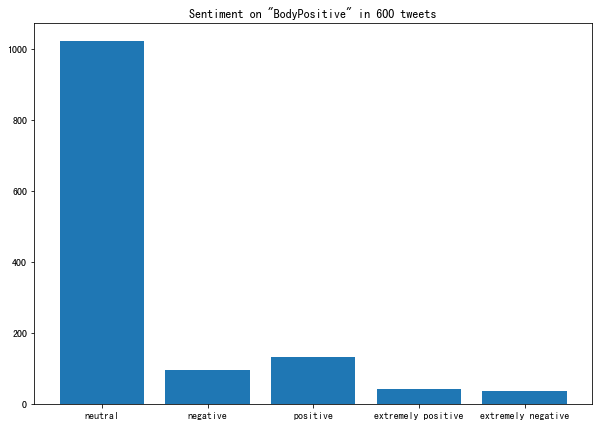

In [46]:
import matplotlib.pyplot as plt
count = lambda df,c: len(df[df['sentiment'] == c])
cate = ["neutral","negative","positive","extremely positive","extremely negative"]

plt.figure(figsize=(10,7))
plt.title('Sentiment on AxieInfinity from 2018 - 2022')
plt.bar(cate,height=[count(senti_score_by_day,c) for c in cate])

# Topic(Keyword) Analysis

In [47]:
senti_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537000 entries, 0 to 536999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    537000 non-null  object 
 1   Tweets  537000 non-null  object 
 2   p_neg   537000 non-null  float64
 3   p_neu   537000 non-null  float64
 4   p_pos   537000 non-null  float64
 5   p_comp  537000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 28.7+ MB


In [48]:
senti_score_df

,date,Tweets,p_neg,p_neu,p_pos,p_comp
0,2018-03-05,I just published You ready to reveal your Axies,0.000,0.762,0.238,0.3612
1,2018-03-14,DAppCipher Browser5 Axie Infinity CryptoBots ...,0.147,0.853,0.000,-0.2263
2,2018-03-18,THE BREAKOUT HAS BEGUN The first batch of Orig...,0.000,1.000,0.000,0.0000
3,2018-03-18,We added a really cool Intro section on our si...,0.000,0.861,0.139,0.3804
4,2018-03-19,BTC Axie Infinity Redefinition of Blockchain G...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
536995,2022-03-04,TAMGeth AxieBoss AxieInfinity JuanMoreno10 Fra...,0.000,1.000,0.000,0.0000
536996,2022-03-04,Desinstalei todos os jogos exceto o pior deles...,0.000,1.000,0.000,0.0000
536997,2022-03-04,Coins PH enables Ronin for lower gas fees fast...,0.087,0.913,0.000,-0.2960
536998,2022-03-04,AxieLima AxieInfinityES nixeniego axiephoffici...,0.000,1.000,0.000,0.0000


In [50]:
content = []
for day in senti_score_by_day.index:
    print(day)
    day_df = senti_score_df[senti_score_df['date']==day].reset_index(drop=True)
    day_content = ''
    for i in range(len(day_df)):
        day_content += day_df.iloc[i,1] + ' '
    content.append(day_content)
content_by_day = pd.DataFrame(data=content,index=senti_score_by_day.index,columns=['day_content'])

2018-03-05
2018-03-14
2018-03-18
2018-03-19
2018-03-20
2018-03-21
2018-03-22
2018-03-23
2018-03-24
2018-03-25
2018-03-26
2018-03-28
2018-03-29
2018-03-30
2018-03-31
2018-04-01
2018-04-02
2018-04-03
2018-04-04
2018-04-05
2018-04-06
2018-04-07
2018-04-08
2018-04-09
2018-04-10
2018-04-11
2018-04-12
2018-04-13
2018-04-14
2018-04-15
2018-04-16
2018-04-17
2018-04-18
2018-04-19
2018-04-20
2018-04-21
2018-04-22
2018-04-23
2018-04-24
2018-04-25
2018-04-26
2018-04-27
2018-04-30
2018-05-01
2018-05-02
2018-05-03
2018-05-04
2018-05-05
2018-05-07
2018-05-08
2018-05-09
2018-05-10
2018-05-11
2018-05-13
2018-05-14
2018-05-15
2018-05-16
2018-05-17
2018-05-18
2018-05-19
2018-05-20
2018-05-21
2018-05-23
2018-05-24
2018-05-25
2018-05-26
2018-05-27
2018-05-28
2018-05-29
2018-05-30
2018-05-31
2018-06-01
2018-06-02
2018-06-03
2018-06-04
2018-06-05
2018-06-06
2018-06-07
2018-06-08
2018-06-09
2018-06-10
2018-06-11
2018-06-12
2018-06-13
2018-06-14
2018-06-15
2018-06-16
2018-06-17
2018-06-18
2018-06-19
2018-06-20

In [51]:
content_by_day

,day_content
date,
2018-03-05,I just published You ready to reveal your Axies
2018-03-14,DAppCipher Browser5 Axie Infinity CryptoBots ...
2018-03-18,THE BREAKOUT HAS BEGUN The first batch of Orig...
2018-03-19,BTC Axie Infinity Redefinition of Blockchain G...
2018-03-20,See the overview of AxieInfinity on hackernoon
...,...
2022-02-28,elgorigeller AxieInfinity boom AxieInfinity ...
2022-03-01,AxieLima AxieInfinityES nixeniego axiephoffici...
2022-03-02,Looking for axie scholars Join my discord se...


In [52]:
content_by_day['upper_content'] = content_by_day['day_content'].map(lambda i: i.upper())
content_by_day

,day_content,upper_content
date,,
2018-03-05,I just published You ready to reveal your Axies,I JUST PUBLISHED YOU READY TO REVEAL YOUR AXIES
2018-03-14,DAppCipher Browser5 Axie Infinity CryptoBots ...,DAPPCIPHER BROWSER5 AXIE INFINITY CRYPTOBOTS ...
2018-03-18,THE BREAKOUT HAS BEGUN The first batch of Orig...,THE BREAKOUT HAS BEGUN THE FIRST BATCH OF ORIG...
2018-03-19,BTC Axie Infinity Redefinition of Blockchain G...,BTC AXIE INFINITY REDEFINITION OF BLOCKCHAIN G...
2018-03-20,See the overview of AxieInfinity on hackernoon,SEE THE OVERVIEW OF AXIEINFINITY ON HACKERNOON
...,...,...
2022-02-28,elgorigeller AxieInfinity boom AxieInfinity ...,ELGORIGELLER AXIEINFINITY BOOM AXIEINFINITY ...
2022-03-01,AxieLima AxieInfinityES nixeniego axiephoffici...,AXIELIMA AXIEINFINITYES NIXENIEGO AXIEPHOFFICI...
2022-03-02,Looking for axie scholars Join my discord se...,LOOKING FOR AXIE SCHOLARS JOIN MY DISCORD SE...


In [64]:
wordlist_day = content_by_day['upper_content'].map(lambda i:extract_tags(i,withWeight=True))

In [54]:
from jieba.analyse import *
for keyword, weight in extract_tags(content_by_day.iloc[400,1], withWeight=True):
    print('%s %s' % (keyword, weight))

AXIEINFINITY 0.6483405656334655
AXIEINFINITYJA 0.221384583387037
AXIE 0.189758214331746
BLOCKCHAIN 0.1423186607488095
OFFICIALDLIVE 0.126505476221164
OUT 0.1106922916935185
GABUSCH 0.094879107165873
ME 0.094879107165873
NEONDISTRICTRPG 0.094879107165873
CRYPTOKITTIES 0.094879107165873
BITCOINPALMER 0.07906592263822751
MY 0.07906592263822751
MORE 0.07906592263822751
SO 0.07906592263822751
GAME 0.07906592263822751
VERY 0.07906592263822751
NFT 0.07906592263822751
LIVE 0.07906592263822751
SOME 0.07906592263822751
WILL 0.07906592263822751


In [55]:
hottest_topics = {}
content_by_day.iloc[:,0]
for i in range(len(content_by_day)):
    for keyword,weight in extract_tags(content_by_day.iloc[i,1],withWeight=True):
        if keyword in hottest_topics: hottest_topics[keyword] += weight
        else: hottest_topics[keyword] = weight

In [216]:
wordcloud = sorted(hottest_topics.items(), key=lambda d:d[1], reverse = True)

In [255]:
Topic_map = { 
  'Axie':["AXIE","AXIES"],
  'AxieInfinity':["AXIEINFINITY","INFINITY"],
  "@Jihoz_Axie":['JIHOZAXIE'],
  'Blockchain':['BLOCKCHAIN'],
  'Ethereum':['ETHEREUM','ETH','MYETHEREMON'],
  'NFT':["NFT"],
  "Gods Unchained":['GODSUNCHAINED'],
  'SLP':["SLP"],
  'AXS':["AXS"],
  "OfficalDLive":['OFFICIALDLIVE'], 
  "My Crypto Heroes":["MYCRYPTOHEROES"],
  "Decentraland":["DECENTRALAND"],
  "Opensea":["OPENSEA"],
  "dapps":["DAPPS","DAPPCOM","DAPP","DAPPRADAR"],
  "Gaming":["GAMING","GAME","GAMES"],
  'Land':["LAND"],
  "0xUniverse":["0XUNIVERSE"],
  "Nonfungibles":["NONFUNGIBLES"],
  "Axie Egg":["AXIEGG"],
  "@3XHuman":["3XHUMAN"],
  "Crypto":['CRYPTO'],
  "NeondistrictRPG":['NEONDISTRICTRPG'],
  "Blockchain Cuties":['BLOCKCHAINCUTIE'],
  "ZENZO Ecosystem":['ZENZOECOSYSTEM'],
  "Team":["TEAM"], 
  "Community":['COMMUNITY'], 
  "CS-Commander":['CSCOMMANDER'],
  "RCTech Battles":['RCTECHBATTLES'],"Binance":['BINANCE'],"Tournament":['TOURNAMENT'],"@Gabusch":['GABUSCH'],
}

In [103]:
columns = [key for key,map in Topic_map.items()]
topic_data = []
import builtins
round = getattr(builtins, "round")
for name, text in Topic_map.items():
    column = []
    for i in range(len(wordlist_day)):
        score = 0 # score for the current topic
        for each in text:
            c = dict(wordlist_day.iloc[i]).get(each)
            if c: score += c
        score = round(score,4)
        column.append(score)
    topic_data.append(column)
topic_df = pd.DataFrame(np.array(topic_data).T,columns=columns,index=wordlist_day.index)

In [105]:
topic_df.to_csv('theme_river.csv')

In [110]:
topic_df['month'] = topic_df.index.map(lambda i: i[:7])

In [115]:
topic_score_month_sum = topic_df.groupby(by='month').sum()
topic_score_month_count = topic_df.groupby(by='month').count()
topic_month_score = topic_score_month_sum/topic_score_month_count

In [121]:
topic_month_score.set_index(topic_month_score.index.map(lambda i: i+'-01'),inplace=True)

In [123]:
topic_month_score.to_csv('D3_Graphs/theme_river.csv')

In [126]:
select = [0] + [i for i in range(2,len(topic_month_score.columns))]
topic_month_score.iloc[:,select].to_csv('D3_Graphs/theme_river_withoutAxieInfinity.csv')

In [132]:
#wordlist_day.to_csv('D3_Graphs/wordcloud')

date
2018-03-05    [(JUST, 1.9924612504833332), (PUBLISHED, 1.992...
2018-03-14    [(DAPPCIPHER, 1.0867970457181817), (BROWSER5, ...
2018-03-18    [(ORIGINAXIES, 0.6291982896263157), (AXIEINFIN...
2018-03-19    [(BLOCKCHAIN, 1.2306378311808823), (AXIE, 1.05...
2018-03-20    [(SEE, 2.988691875725), (OVERVIEW, 2.988691875...
                                    ...                        
2022-02-28    [(AXIEINFINITY, 0.7831639597275529), (AXIE, 0....
2022-03-01    [(AXIEINFINITY, 0.6163665498300509), (AXIEINFI...
2022-03-02    [(AXIEINFINITY, 0.7874305977261931), (AXIEINFI...
2022-03-03    [(AXIEINFINITY, 0.6835270828890903), (AXIELIMA...
2022-03-04    [(AXIEINFINITY, 0.75053356699241), (AXIE, 0.18...
Name: upper_content, Length: 1326, dtype: object

# Word Cloud

In [217]:
wordcloud = dict(wordcloud)

In [218]:
# remove stop words
from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')
print('before:{}'.format(len(wordcloud)))
for stopword in stopwordlist:
    if stopword.upper() in wordcloud:
        wordcloud.pop(stopword.upper())
print('after:{}'.format(len(wordcloud)))

before:3804
after:3726


In [219]:
len(wordcloud)

3726

In [220]:
for name, text in Topic_map.items():
    score = 0
    for each in text:
        score += wordcloud.get(each)
        wordcloud.pop(each)
    print(name,score)
    wordcloud[name] = score
# wordcloud

Axie 269.6355545425278
AxieInfinity 1043.2445264669602
@Jihoz_Axie 55.72186225451157
Blockchain 55.68559361008383
Ethereum 84.13959886699391
NFT 33.01123501027683
Gods Unchained 28.86427467601292
SLP 27.83428434374349
AXS 26.111253718730275
OfficalDLive 20.316362489297212
My Crypto Heroes 18.574192856389345
Decentraland 23.78156567469253
Opensea 17.871398780089027
dapps 37.238597684974074
Gaming 86.66915449371103
Land 14.613641213479927
0xUniverse 14.312129329558296
Nonfungibles 12.606167010015678
Axie Egg 14.533789700304018
@3XHuman 11.530595604209996
Crypto 25.6431960933158
NeondistrictRPG 12.039628755483518
Blockchain Cuties 10.97831711179973
ZENZO Ecosystem 8.772288625147793
Team 14.300699564184743
Community 14.232569569232684
CS-Commander 9.92043341834786
RCTech Battles 9.686089749723834
Binance 9.413676707775542
Tournament 9.256640601271643
@Gabusch 8.570915137156632


In [222]:
wordcloud = dict(sorted(wordcloud.items(), key=lambda d:d[1], reverse = True))

In [224]:
wordcloud = pd.DataFrame(data=np.array([list(map(lambda i: i[0], wordcloud.items())),list(map(lambda i: i[1], wordcloud.items()))]).T,columns = ['Keyword','Weight'])

In [225]:
wordcloud.iloc[:,0] = wordcloud.iloc[:,0].map(lambda i: i.upper())
wordcloud.reset_index(drop=True,inplace=True)

In [227]:
wordcloud.to_csv('D3_Graphs/wordcloud.csv',index_label=False)

In [247]:
colors = [  "#000099",
            "#3d4db8",
            "#7a99d6",
            "#a3cceb",
            "#ccffff",]

In [254]:
for i in range(200):
    color = colors[i//40]
    
    print("{word: " + '"' + wordcloud.iloc[i,0] + '"' + ', size: ' + '"'+str(int(float(wordcloud.iloc[i,1])))+'"' + ', colo: ' + '"'+color + '"'+'},')

{word: "AXIEINFINITY", size: "1043", colo: "#000099"},
{word: "AXIE", size: "269", colo: "#000099"},
{word: "GAMING", size: "86", colo: "#000099"},
{word: "ETHEREUM", size: "84", colo: "#000099"},
{word: "@JIHOZ_AXIE", size: "55", colo: "#000099"},
{word: "BLOCKCHAIN", size: "55", colo: "#000099"},
{word: "CRYPTOKITTIES", size: "42", colo: "#000099"},
{word: "AXIEINFINITYJA", size: "38", colo: "#000099"},
{word: "DAPPS", size: "37", colo: "#000099"},
{word: "NFT", size: "33", colo: "#000099"},
{word: "GODS UNCHAINED", size: "28", colo: "#000099"},
{word: "SLP", size: "27", colo: "#000099"},
{word: "AXS", size: "26", colo: "#000099"},
{word: "CRYPTO", size: "25", colo: "#000099"},
{word: "NEW", size: "23", colo: "#000099"},
{word: "DECENTRALAND", size: "23", colo: "#000099"},
{word: "IM", size: "21", colo: "#000099"},
{word: "CHECK", size: "21", colo: "#000099"},
{word: "OFFICALDLIVE", size: "20", colo: "#000099"},
{word: "LIVE", size: "18", colo: "#000099"},
{word: "MY CRYPTO HEROES", 

In [275]:
senti_score_by_day['pos_score'] = senti_score_by_day['p_comp'].map(lambda i: i if i > 0 else 0)
senti_score_by_day['neg_score'] = senti_score_by_day['p_comp'].map(lambda i: abs(i) if i < 0 else 0)

In [ ]:
senti_score_by_day['top1_word'] = wordlist_day.map(lambda i: i[0][0])
senti_score_by_day['top2_word'] = wordlist_day.map(lambda i: i[1][0])

In [277]:
senti_score_by_day.to_csv('D3_Graphs/senti_score.csv',index_label=False)

In [278]:
senti_score_by_day['month'] = senti_score_by_day.index.map(lambda i:i[:7])

In [331]:
content_by_day['month'] = content_by_day.index.map(lambda i:i[:7])
content_by_day

,day_content,upper_content,month
date,,,
2018-03-05,I just published You ready to reveal your Axies,I JUST PUBLISHED YOU READY TO REVEAL YOUR AXIES,2018-03
2018-03-14,DAppCipher Browser5 Axie Infinity CryptoBots ...,DAPPCIPHER BROWSER5 AXIE INFINITY CRYPTOBOTS ...,2018-03
2018-03-18,THE BREAKOUT HAS BEGUN The first batch of Orig...,THE BREAKOUT HAS BEGUN THE FIRST BATCH OF ORIG...,2018-03
2018-03-19,BTC Axie Infinity Redefinition of Blockchain G...,BTC AXIE INFINITY REDEFINITION OF BLOCKCHAIN G...,2018-03
2018-03-20,See the overview of AxieInfinity on hackernoon,SEE THE OVERVIEW OF AXIEINFINITY ON HACKERNOON,2018-03
...,...,...,...
2022-02-28,elgorigeller AxieInfinity boom AxieInfinity ...,ELGORIGELLER AXIEINFINITY BOOM AXIEINFINITY ...,2022-02
2022-03-01,AxieLima AxieInfinityES nixeniego axiephoffici...,AXIELIMA AXIEINFINITYES NIXENIEGO AXIEPHOFFICI...,2022-03
2022-03-02,Looking for axie scholars Join my discord se...,LOOKING FOR AXIE SCHOLARS JOIN MY DISCORD SE...,2022-03


In [340]:
content = []
for month in content_by_day['month'].unique():
    print(month)
    month_df = content_by_day[content_by_day['month']==month].reset_index(drop=True)
    month_content = ''
    for i in range(len(month_df)):
        month_content += month_df.iloc[i,1] + ' '
    content.append(month_content)
content_by_month = pd.DataFrame(data=content,index=content_by_day['month'].unique(),columns=['month_content'])

2018-03
2018-04
2018-05
2018-06
2018-07
2018-08
2018-09
2018-10
2018-11
2018-12
2019-01
2019-02
2019-03
2019-04
2019-05
2019-06
2019-07
2019-08
2019-09
2019-10
2019-11
2019-12
2020-01
2020-02
2020-03
2020-04
2020-05
2020-06
2020-07
2020-08
2020-09
2020-10
2020-11
2020-12
2021-01
2021-02
2021-03
2021-04
2021-05
2021-06
2021-07
2021-08
2021-09
2021-10
2022-02
2022-03


In [363]:
monthword_list = pd.DataFrame(content_by_month.iloc[:,0].map(lambda i: extract_tags(i)))

In [365]:
monthword_list

,month_content
2018-03,"[AXIE, BLOCKCHAIN, INFINITY, AXIEINFINITY, AXI..."
2018-04,"[AXIEINFINITY, AXIE, ETHEREUM, DAPPS, BLOCKCHA..."
2018-05,"[AXIEINFINITY, ETHEREUM, BLOCKCHAIN, AXIE, AXI..."
2018-06,"[AXIEINFINITY, AXIEINFINITYJA, AXIE, ETHEREUM,..."
2018-07,"[AXIEINFINITY, AXIEINFINITYJA, AXIE, PURRBOOK,..."
2018-08,"[AXIEINFINITY, AXIE, BETA, ETHEREUM, GAMING, E..."
2018-09,"[AXIEINFINITY, AXIE, GAMING, ETH, BLOCKCHAIN, ..."
2018-10,"[AXIEINFINITY, AXIE, BATTLES, BLOCKCHAIN, MY, ..."
2018-11,"[AXIEINFINITY, AXIE, OUT, ETH, OUR, WILL, CRYP..."
2018-12,"[AXIEINFINITY, AXIE, MYCRYPTOHEROES, ZENZOECOS..."


In [366]:
def top3(s):
    out,i = [],1
    while len(out) < 3:
        word = s[i]
        if word.lower() not in stopwordlist and word.lower()!='infinity': out.append(word)
        i+=1
    return out

monthword_list['top3'] = monthword_list['month_content'].map(lambda i: top3(i))

In [378]:
senti_score_by_month['top1word'] = monthword_list['top3'].map(lambda i:i[0])
senti_score_by_month['top2word'] = monthword_list['top3'].map(lambda i:i[1])
senti_score_by_month['top3word'] = monthword_list['top3'].map(lambda i:i[2])
senti_score_by_month

,p_comp,sentiment,colormap,pos_score,neg_score,top1word,top2word,top3word
month,,,,,,,,
2018-03,0.125404,positive,#69b3a2,0.125404,0.000000,BLOCKCHAIN,AXIEINFINITY,AXIES
2018-04,-0.061874,negative,#e69980,0.000000,0.061874,AXIE,ETHEREUM,DAPPS
2018-05,0.038199,neutral,#80cc99,0.038199,0.000000,ETHEREUM,BLOCKCHAIN,AXIE
2018-06,-0.043622,negative,#e69980,0.000000,0.043622,AXIEINFINITYJA,AXIE,ETHEREUM
2018-07,-0.002117,neutral,#80cc99,0.000000,0.002117,AXIEINFINITYJA,AXIE,PURRBOOK
2018-08,0.014640,neutral,#80cc99,0.014640,0.000000,AXIE,BETA,ETHEREUM
2018-09,0.099088,positive,#69b3a2,0.099088,0.000000,AXIE,GAMING,ETH
2018-10,-0.038057,neutral,#80cc99,0.000000,0.038057,AXIE,BATTLES,BLOCKCHAIN
2018-11,0.107992,positive,#69b3a2,0.107992,0.000000,AXIE,ETH,CRYPTOKITTIES


In [379]:
senti_score_by_month.to_csv('D3_Graphs/senti_score.csv')